# Melbourne housing snapshot
On this Kaggle exercise we will implement an algorithm of classification called decision trees in order to predict a binary value from Melbourne houses.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = "C:/Users/Jorge/Documents/Programacion/Python p/Machine learning/datasets/melb_data.csv"
melb_data = pd.read_csv(file_path)

melb_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Droping columns with missing values:

In [3]:
melb_data = melb_data.dropna(axis=0)

Selecting the prediction target:

In [4]:
y = melb_data.Price

Selecting features:

In [5]:
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

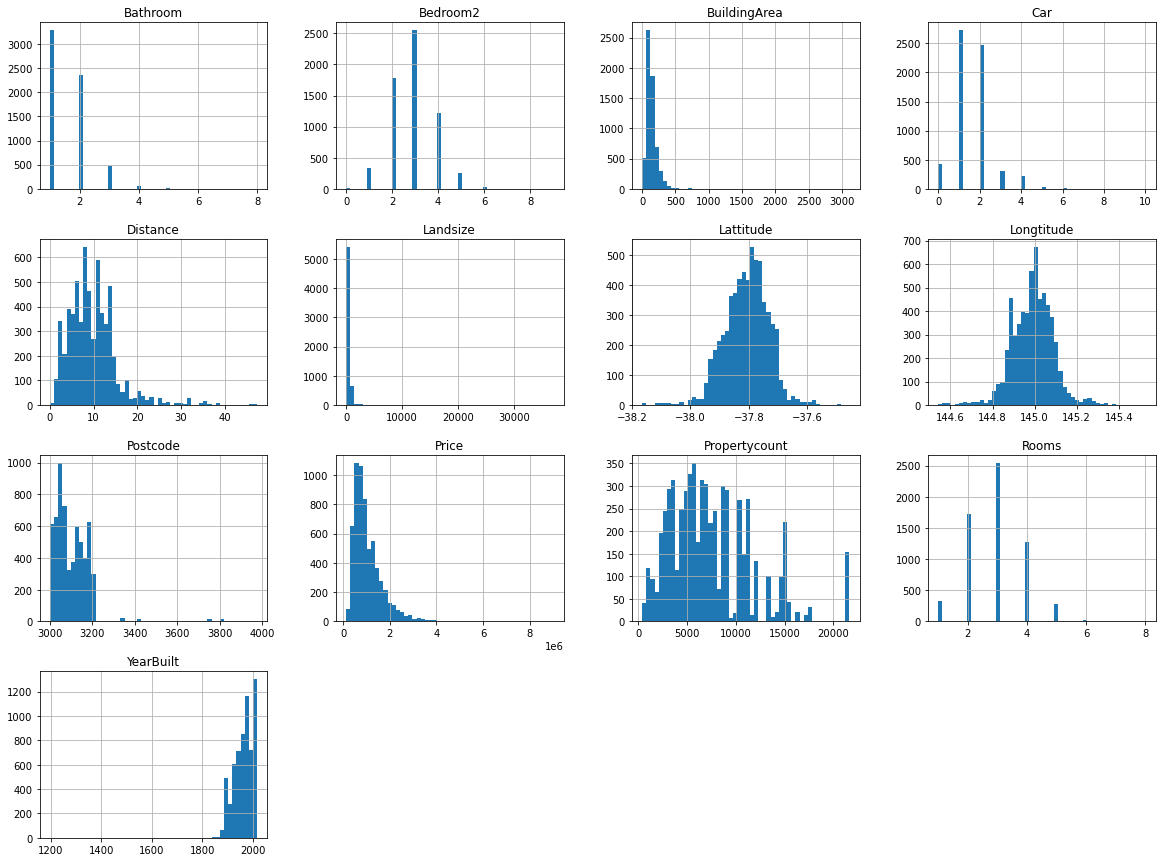

In [11]:
%matplotlib inline
melb_data.hist(bins=50,figsize=(20,15))
plt.show()

In [6]:
X = melb_data[features]

In [7]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201
std,0.971079,0.711362,897.449881,0.075850,0.099165
min,1.000000,1.000000,0.000000,-38.164920,144.542370
25%,2.000000,1.000000,152.000000,-37.855438,144.926198
50%,3.000000,1.000000,373.000000,-37.802250,144.995800
75%,4.000000,2.000000,628.000000,-37.758200,145.052700
max,8.000000,8.000000,37000.000000,-37.457090,145.526350


In [8]:
X.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
1,2,1.0,156.0,-37.8079,144.9934
2,3,2.0,134.0,-37.8093,144.9944
4,4,1.0,120.0,-37.8072,144.9941
6,3,2.0,245.0,-37.8024,144.9993
7,2,1.0,256.0,-37.8060,144.9954


## Model
* Define
* Fit
* Predict
* Evaluate

In [9]:
from sklearn.tree import DecisionTreeRegressor
# Define
melb_model = DecisionTreeRegressor(random_state=1)
# Fit
melb_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [10]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melb_model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
4      4       1.0     120.0   -37.8072    144.9941
6      3       2.0     245.0   -37.8024    144.9993
7      2       1.0     256.0   -37.8060    144.9954
The predictions are
[1035000. 1465000. 1600000. 1876000. 1636000.]


## Model validation
The MAE is defined as error = actual - predicted

In [13]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melb_model.predict(X)
mean_absolute_error(y,predicted_home_prices)

1115.7467183128902

In [17]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X,y,random_state = 0)

melb_model = DecisionTreeRegressor()
melb_model.fit(train_X, train_y)


val_predictions = melb_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

273762.3107381106


## Underfitting and Overfitting

Overfitting, where a model matches the training data almost perfectly, but does poorly in validation and other new data. Underfitting, when a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data.

To help compare MAE scores from different values we can use the following:

In [18]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [19]:
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  385696
Max leaf nodes: 50  		 Mean Absolute Error:  279794
Max leaf nodes: 500  		 Mean Absolute Error:  261718
Max leaf nodes: 5000  		 Mean Absolute Error:  271996


In [21]:
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in [5, 50, 500, 5000]}
best_tree_size = min(scores, key=scores.get)

In [22]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=500, random_state=1)